In [2]:
import numpy as np #berfungsi untuk memanggil atau memasukkan library numpy yang diinisialisasikan dengan np
import matplotlib.pyplot as plt #berfungsi untuk memanggil atau memasukkan library matplotlib.pyplot yang diinisialisasikan dengan plt
import cv2 as cv #berfungsi untuk memanggil atau memasukkan library cv2 yang diinisialisasikan dengan cv

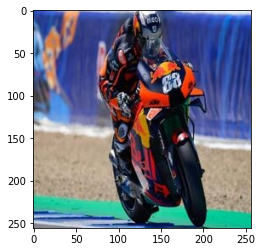

In [3]:
img1 = plt.imread("gambar1.jpg") #berfungsi untuk menampilkan gambar1.jpg
plt.imshow(img1)

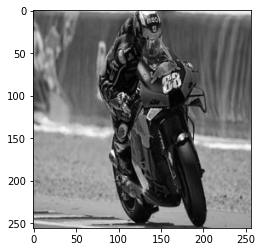

In [4]:
img1 = cv.imread("gambar1.jpg") #berfungsi untuk memanggil atau mengimport gambar yang terdapat didalam file
gray_img1 = cv.cvtColor(img1, cv.COLOR_RGB2GRAY) #berfungsi untuk merubah warna gambar menjadi gray atau abu-abu
plt.imshow(gray_img1, cmap='gray')

In [5]:
print(gray_img1)

[[104 107 112 ... 242 241 239]
 [102 104 109 ... 239 238 237]
 [ 98 100 105 ... 236 236 236]
 ...
 [136 135 134 ... 153 154 156]
 [133 132 133 ... 154 155 155]
 [135 133 134 ... 156 156 157]]


NOMOR 1 HISTOGRAM IMAGE 1

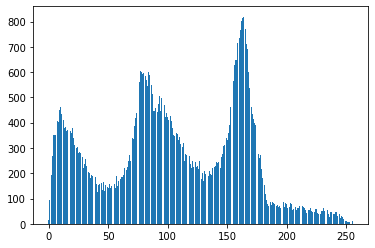

In [6]:
def hist(img1): #membuat function untuk histogram pada image 1
    hasil = np.zeros(img1.shape[0]) #berfungsi untuk membuat array pada image 1 yang berisi kosong
    for i in range (img1.shape[0]): #melakukan perulangan yang terdapat pada baris pada image 1
        for j in range (img1.shape[1]): #melakukan perulangan yang terdapat pada kolom pada image 1
            x=int(img1[i, j])
            hasil[x] += 1

    y = [i for i in range (img1.shape[0])]
    plt.bar(y, hasil) #berfungsi untuk menampilkan histogram

hist(gray_img1)

NOMOR 2 EKUALISASI HISTOGRAM

In [7]:
def equalize(img1, level):
  hist = np.zeros(level).astype(int)
  t, l = img1.shape

  #berfungsi untuk mencari histogram pada image 1
  for i in range(t):
    for j in range(l):
      hist[img1[i,j]] +=1

  #berfungsi untuk mencari histogram kumulatif pada image 1
  gldc = np.zeros(level).astype(int)
  for i in range(level):
    gldc[i] = np.sum(hist[0:i+1])

  #fungsi untuk mengeksekusi formula
  target_value = gldc*(level-1)/(t*l)
  target_value = np.floor(target_value).astype(int)

  result = np.zeros(img1.shape)
  for i in range(t):
    for j in range(l):
      result[i, j] = target_value[img1[i,j]]
  
  return result

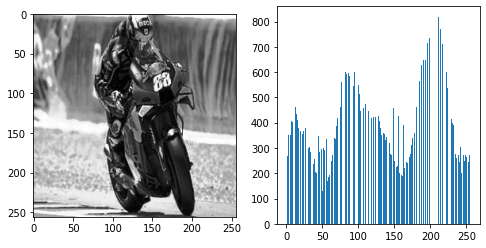

In [47]:
gray_equ1 = equalize(gray_img1, 256).astype(int)
plt.figure(figsize=[8, 4], facecolor='white')
plt.subplot(121)
plt.imshow(gray_equ1, cmap='gray')
plt.subplot(122)
hist(gray_equ1)

In [26]:
print(gray_equ1)

[[131 135 141 ... 254 253 253]
 [128 131 138 ... 253 253 253]
 [121 124 132 ... 253 253 253]
 ...
 [163 162 161 ... 181 183 188]
 [160 159 160 ... 183 185 185]
 [162 160 161 ... 188 188 190]]


NOMOR 3 SPESIFIKASI HISTOGRAM IMAGE 1 BERDASARKAN HISTOGRAM IMAGE 2

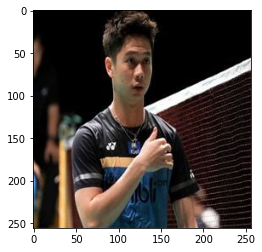

In [12]:
img2 = plt.imread("gambar2.jpg") #berfungsi untuk menampilkan gambar2.jpg
plt.imshow(img2)

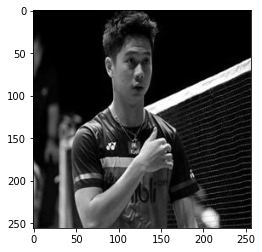

In [13]:
img2 = cv.imread("gambar2.jpg") #berfungsi untuk memanggil atau mengimport gambar yang terdapat didalam file
gray_img2 = cv.cvtColor(img2, cv.COLOR_RGB2GRAY) #berfungsi untuk merubah warna gambar menjadi gray atau abu-abu
plt.imshow(gray_img2, cmap='gray')

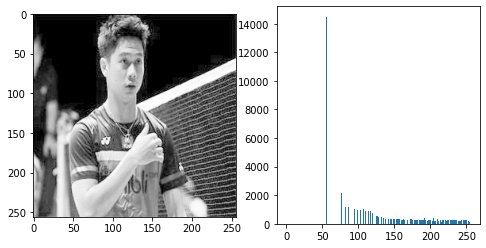

In [27]:
gray_equ2 = equalize(gray_img2, 256).astype(int)
plt.figure(figsize=[8, 4], facecolor='white')
plt.subplot(121)
plt.imshow(gray_equ2, cmap='gray')
plt.subplot(122)
hist(gray_equ2)

In [28]:
print(gray_equ2)

[[120 114 107 ... 107 114 120]
 [ 91  82  69 ...  69  82  91]
 [ 86  77  56 ...  56  77  86]
 ...
 [197 193 189 ...  82  69  77]
 [196 192 187 ...  91  69  91]
 [197 194 189 ... 110  95  99]]


In [36]:
def gray_level(result): #membuat fungsi dengan menerapkan invers pada level ekualisasi histogram
    
    sum = result.shape[0] * result.shape[1]
    glds = np.zeros(256).astype(int)
    for i in result:
        for j in i:
            glds[j] += 1

    gldsc = np.zeros(256).astype(int)
    for i in range (0, 256):
        for j in range (i+1):
            gldsc[i] += glds[j]

    sum_kumulatif = (gldsc/sum)*255
    return np.array(np.round(sum_kumulatif)).astype(int)

In [37]:
#berfungsi untuk melakukan pemetaan histogram asli ke histogram ekualisasi
source_gray = gray_level(gray_img1)
arrive_gray = gray_level(gray_img2)

In [38]:
def find_closest_color(nilai, tujuan): #membuat fungsi untuk melakukan pemetaan pada operasi spesifikasi histogram selanjutnya 
  min = abs(nilai-tujuan[0])
  warna_min = 0
  for i in range(len(tujuan)):
    cheking = abs(nilai-tujuan[i])
    if(min > cheking):
      min = cheking
      warna_min = i
  return warna_min


map = np.zeros(256, dtype=int)
for i in range(256):
  map[i] = find_closest_color(source_gray[i], arrive_gray)

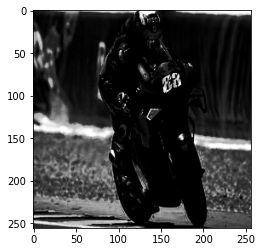

In [39]:
result = np.copy(gray_img1)
for i in range (256):
    for j in range (256):
        result[i, j] = map[result[i, j]]

plt.imshow(result, cmap='gray') #berfungsi untuk menampilkan hasil dari spesifikasi histogram pada image 1

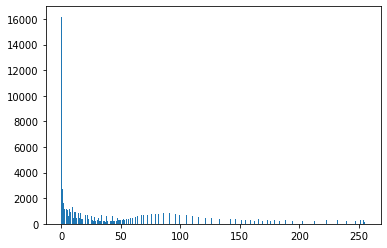

In [44]:
hist(result)

In [45]:
print(result)

[[ 18  20  25 ... 254 254 254]
 [ 16  18  22 ... 254 251 251]
 [ 14  15  19 ... 251 251 251]
 ...
 [ 42  41  40 ...  58  60  64]
 [ 40  39  40 ...  60  62  62]
 [ 41  40  40 ...  64  64  67]]
